## 反向传播，激活函数，多层感知机

在这次作业中，我们将会动手实现一个神经网络结构，在此过程当中，我们将定义神经网络中的每一层(layer)，并实现一些激活函数(activation function)，最终我们将他们组装来实现多层感知机(MLP)，并在一个简单的数据集上进行测试。

本次小作业含有3个简答题，请勿遗漏。

**本次小作业截止时间：2024/3/31 23:59, 请在canvas系统中及时提交。**

以下内容节选自《动手学机器学习》

## 8.1 人工神经网络

既然动物能够通过神经元建立智能，我们自然会想，能不能通过模拟神经元的结构和行为方式，建立起人工智能呢？于是，从1943年的沃伦·麦卡洛克（Warren McCulloch）和沃尔特·皮茨（Walter Pitts）开始，研究者们设计了人工神经网络（artificial neural network，ANN），现在通常简称为神经网络（NN）。在NN中，最基本的单位也是神经元。在最开始的设计中，人工神经元完全仿照生物神经元的结构和行为方式，而大量的神经元互相连接，构成一张有向图。设神经元$i=1,\ldots,N_j$向神经元$j$发送了信号$o_i$，那么在神经元$j$中的处理方式为：将这些神经元发送的信号通过连接权重$w_{ji}$加权求和，得到内部信号总和$z_j$，即
$$
z_j = \sum_{i=1}^{N_j} w_{ji} o_i
$$

此外，每个神经元$j$还有提前设置好的阈值$T_j$，当处理结果$z_j < T_j$时，神经元$j$的输出$o_j=0$，反之输出$o_j=1$。这一设计是为了模拟生物神经元的激励与抑制信号。这样，当某个神经元收到外部输入时，就会对输入进行处理，再按上面的计算方式给其指向的其他神经元输出新的信号。这样的行为方式与生物神经元非常相似，然而，其表达能力十分有限，能解决的问题也很少。此外，每个神经元上的参数还需要人为指定。因此，这时的神经网络还只是具有雏形。

## 8.2 感知机

上文提到的神经网络的最大问题在于，每条边上的权重都需要人为指定。当神经网络的规模较大、结构较为复杂时，我们很难先验地通过数学方法计算出合适的权重，从而这样的网络也很难用来解决实际问题。为了简化复杂的神经网络，1958年，弗兰克·罗森布拉特（Frank Rosenblatt）提出了感知机（perceptron）的概念。他从生物接受刺激、产生感知的过程出发，用神经网络抽象出了这一模型，如图8-2所示。与原始的神经网络类似，输入经过神经元后被乘上权重并求和。但是，感知机还额外引入了偏置（bias）$b$项，把它一起加到求和的结果上。最后，该结果再通过模型的激活函数（activation function），得到最终的输出。

<img src=perceptron.drawio.png width=70% alt=perceptron>

图 8-2 感知机的结构

感知机中有两个新引入的结构。第一是偏置，它相当于给线性变换加入了常数项。我们知道，对于一维的线性函数$f(x)=kx$来说，无论我们如何调整参数$k$，它都一定经过原点。而加入常数项变为$f(x)=kx+b$后，它就可以表示平面上的任意一条直线，模型的表达能力大大提高了。第二是激活函数，它可以模拟神经元的兴奋和抑制状态。在感知机中，激活函数通常是示性函数$\mathbb{I}(z\ge0)$。当输入$z$非负时，函数输出1，对应兴奋状态；输入为负数时，函数输出0，对应抑制状态。整个感知机模拟了一组神经元受到输入刺激后给出反应的过程，可以用来解决二分类问题。

感知机最重要的进步在于，它的参数可以自动调整，无须再由人工繁琐地一个一个调试。假设二分类问题中，样本的特征为$x_1,\ldots,x_m$，标签$y\in\{0,1\}$。那么感知机对该样本的预测输出为：
$$
\hat y = \mathbb{I}\left(\sum_{i=1}^m w_ix_i + b \ge 0\right)
$$

罗森布拉特利用生物中的负反馈调节机制来调整感知机的参数。对于该样本，感知机收到的反馈为$\hat y - y$，其参数根据反馈进行更新：
$$
\begin{aligned}
w_i & \gets w_i - \eta (\hat y - y) x_i \\
b_i & \gets b_i - \eta (\hat y - y)
\end{aligned}
$$

其中，$\eta$是学习率。如果感知机的预测正确，即$\hat y = y$，其收到的反馈为0，参数不更新。如果感知机预测为0，但样本的真实标签为1，感知机收到的反馈为-1，说明其预测结果整体偏大，需要将权重和偏置下调；如果感知机预测为1，真实标签为0，则需要将权重和偏置上调。可以看出，这一思想已经具有了梯度下降法的影子。凭借着参数自动训练的优点，感知机成为了第一个可以解决简单实际问题的神经网络。罗森布拉特曾在电脑中构建出感知机模型，并用打孔卡片进行训练，卡片上的孔位于左侧或右侧。在50次试验后，模型学会了判断卡片上的孔位于哪一边。

然而，感知机模型存在致命的缺陷，那就是它只能处理线性问题。1969年，马文·明斯基（Marvin Minsky）提出了异或问题。对输入$x_1,x_2 \in \{0,1\}$，当其相同时输出0，不同时输出1。作为一个简单的逻辑运算，异或的真值表如表8-1所示。

表 8-1 异或运算的真值表

|$x_1$|$x_2$|$x_1\ \mathrm{xor}\ x_2$|
|:--:|:--:|:--:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

异或问题的输入只有4种可能，如果把所有输入和其输出在平面直角坐标系中画出来，无非是4个点而已，如图8-3所示。其中，左下和右上的点是红色，左上和右下的点是蓝色。要解决异或问题，模型只需要将红色和蓝色的点区分开。然而，读者可以自行验证，红点和蓝点无法只通过一条直线分隔开，从而感知机无法解决异或问题。这一事实被提出后，感知机的表达能力和应用场景遭到广泛质疑，神经网络的研究也陷入了寒冬。

<img src=xor.png width=45% alt=xor>

图 8-3 异或问题的几何表示

## 8.3 隐含层与多层感知机

为了进一步增强网络的表达能力，突破只能解决线性问题的困境，有研究者提出增加网络的层数，即将一个感知机的输出作为输入，连接到下一个感知机上。如果一个感知机对应平面上的一条直线，那么多个感知机就可以将平面分隔成多边形区域，达到超越线性的效果。图8-4给出了一个形象的示例。

<img src="multilinear.drawio.png" width="80%" alt="multilinear">

图 8-4 多层感知机与单层感知机的分隔边界

然而，如果不同层之间的神经元可以随意连接，往往会有多种结构可以解决同一个问题，从而大大增加结构设计的难度。例如，图8-5中的两种结构都可以解决异或问题，其中边上的数字代表权重$w$。偏置和激活函数都直接标注在了神经元上，神经元将所有输入相加后经过激活函数，再向后输出。读者可以自行验证这两种结构的正确性。

<img src="multisol.drawio.png" width="90%" alt="multisol">

图 8-5 两种不同结构的解决异或问题的多层感知机

因此，当我们组合多个单层的感知机时，通常采用前馈（feedforward）结构，即将神经元分为不同的层，每一层只和其前后相邻层的神经元连接，层内以及间隔一层以上的神经元之间没有连接。这样，我们可以将网络的结构分为直接接收输入的输入层（input layer）、中间进行处理的隐含层（hidden layer）、以及最终给出结果的输出层（output layer）。图8-6是一个两层的前馈网络示意图。需要注意，前馈网络的层数是指权重的层数，即边的层数，而神经元上不携带权重。

<img src="feedforward.drawio.png" width="60%" alt="feedforward">

图 8-6 前馈神经网络示意

将多个单层感知机按前馈结构组合起来，就形成了多层感知机（multi-layer perceptron，MLP）。事实上，图8-6已经是一个两层的多层感知机，隐含层神经元内部的$\phi$和输出层神经元内部的$\phi_\mathrm{out}$分别代表隐含层和输出层的激活函数。偏置项可以与权重合并，因此图中将其略去。

下面，我们以图8-7中的三层MLP为例，详细写出MLP中由输入计算得到输出的过程。设第$i$层的权重、偏置和激活函数分别为$\boldsymbol W_i$，$\boldsymbol b_i$和$\phi_i$。那么对于输入$\boldsymbol x \in \mathbb{R}^3$，该MLP进行的运算依次为：

- 第一层：$\boldsymbol l_1 = \phi_1(\boldsymbol W_1 \boldsymbol x + \boldsymbol b_1)$。由于下一层的维度是4，因此$\boldsymbol W_1 \in \mathbb{R}^{4\times3}$，$\boldsymbol b_1 \in \mathbb{R}^4$，输出$\boldsymbol l_1 \in \mathbb{R}^4$。

- 第二层：$\boldsymbol \phi_2 = f_2(\boldsymbol W_2 \boldsymbol l_1 + \boldsymbol b_2)$。同理，$\boldsymbol W_2 \in \mathbb{R}^{2\times 4}$，$\boldsymbol b_2 = \mathbb{R}^2$，输出$\boldsymbol l_2 \in \mathbb{R}^2$。

- 第三层，即输出层：$y = \phi_3(\boldsymbol W_3 \boldsymbol l_2 + b_3)$。由于输出$y$是标量，这里$\boldsymbol W_3 \in \mathbb{R}^{1\times 2}$，$b_3 \in \mathbb{R}$。

<img src="MLP3.drawio.png" width="80%" alt="MLP3">

图 8-7 三层的MLP运算过程

如果把上面三层所做的运算连起来写，就得到：
$$
y = \phi_3(\boldsymbol W_3 \phi_2(\boldsymbol W_2 \phi_1(\boldsymbol W_1 x + \boldsymbol b_1) + \boldsymbol b_2) + b_3)
$$

那么这些激活函数能否就用线性函数来实现，还是说一定得是非线性函数呢？我们可以做以下简单推导：假如所有的激活函数$\phi$都是线性函数，即$\phi(\boldsymbol W \boldsymbol x + \boldsymbol b) = \boldsymbol W \phi(\boldsymbol x) + \boldsymbol b$，那么上式就会变为：
$$
y = \boldsymbol W_3 \boldsymbol W_2 \boldsymbol W_1 \phi_3(\phi_2(\phi_1(\boldsymbol x))) + \boldsymbol W_3 \boldsymbol W_2 \boldsymbol b_1 + \boldsymbol W_3 \boldsymbol b_2 + b_3
$$

这与一个权重$\boldsymbol W = \boldsymbol W_3 \boldsymbol W_2 \boldsymbol W_1$，偏置$\boldsymbol b= \boldsymbol W_3 \boldsymbol W_2 \boldsymbol b_1 + \boldsymbol W_3 \boldsymbol b_2 + b_3$，激活函数为$\phi_3(\phi_2(\phi_1(x)))$的单层感知机完全一致。这样的多层感知机仅在线性意义上提高了网络的表达能力，仍然是在用多个超平面来对样本进行分割。因此，激活函数一定得是非线性的，才能使网络模型有更广的拟合能力。目前，常用的激活函数有：

- 逻辑斯谛函数：$\sigma(x) = 1 / (1+e^{-x})$。该函数又称sigmoid函数，在逻辑斯谛回归一章中已经介绍过，会将$x$映射到$(0,1)$区间内。直观上，可以将0对应生物神经元的静息状态，1对应兴奋状态。相比于示性函数$\mathbb{I}(x\ge0)$，逻辑斯谛函数更加平滑，并且易于求导。逻辑斯谛函数的推广形式是softmax函数，两者没有本质不同。

- 双曲正切（tanh）函数：$\tanh(x) = (e^x - e^{-x}) / (e^x + e^{-x})$。该函数将$x$映射到$(-1, 1)$，图像如图8-8所示，与逻辑斯谛函数均为“S”形曲线，同样常用与分类任务。

<img src="tanh.png" width="50%" alt="tanh">

图 8-8 双曲正切函数的图像

- 线性整流单元（rectified linear unit，ReLU）：$\mathrm{ReLU}(x) = \max\{x, 0\}$。该函数将小于0的输入都变成0，而大于0的输入保持原样，图像如图8-9所示。虽然函数的两部分都是线性的，但在大于0的部分并不像示性函数$\mathbb{I}(x \ge 0)$一样是常数，因此存在梯度，并且保持了原始的输入信息。一些研究表明，ReLU函数将大约一半的神经元输出设置为0、即静息状态的做法，与生物神经元有相似之处。

<img src="relu.png" width="50%" alt="relu">

图 8-9 ReLU函数的图像

在实践中，考虑到不同隐含层之间的对称性，我们一般让所有隐含层的激活函数相同。而ReLU函数作为计算最简单、又易于求导的选择，在绝大多数情况下都被用作隐含层的激活函数。输出层的激活函数与任务对输出的要求直接相关，需要根据不同的任务而具体选择。例如，二分类问题可以选用逻辑斯谛函数，多分类问题可以选用softmax函数，要求输出在$(a,b)$区间内的问题可以选用$\frac{b-a}{2}\tanh(x) + \frac{b+a}{2}$。MLP相比于单层感知机的表达能力提升，关键就在于非线性激活函数的复合。理论上可以证明，任意一个$\mathbb{R}^n$上的连续函数，都可以由大小合适的MLP来拟合，而对其非线性激活函数的形式要求很少。该定理称为普适逼近定理，为神经网络的有效性给出了最基础的理论保证。

从上面的分析中可以看出，非线性部分对提升模型的表达能力十分重要。事实上，非线性变换相当于提升了数据的维度。例如二维平面上的点$(x_1,x_2)$，经过变换$f(x_1,x_2)=x_1^2+x_2^2$，就可以看作三维空间中的点$(x_1,x_2,x_1^2+x_2^2)$。原本在同一平面上的点经过这样的非线性变换，就分布到三维空间中去了。但如果变换是线性的，原本在同一平面上的点变换后在空间中仍然位于同一平面上，只不过是所处的平面做了平移、旋转。虽然看上去这些点也在三维空间，但本质上来说，数据间的相对位置关系并没有改变。因此，线性变换对提升模型的表达能力没有太大帮助，而连续的线性变换如上面的推导所示，还可以合并成一个线性变换。

数据维度提升的好处在于，在低维空间中线性不可分的数据，经过合适的非线性变换，在高维空间中可能变得线性可分。例如，在前文描述的异或问题中，我们通过某种非线性变换，将原本在平面上的4个点映射到三维空间去。如图8-10所示，右边的绿色平面是$z=0$平面，箭头表示将原本二维的点变换到三维。在变换过后，就可以用$\mathbb{I}(z\ge0)$来直接对样本进行分类。因此，MLP中要不断通过非线性的激活函数提升数据的维度，从而提升表达能力。

<img src="xor3d.png" width="80%" alt="xor3d">

图 8-10 三维空间中的异或问题

## 定义神经网络层的基类

首先我们将会定义一个基类(base class)作为神经网络每一层的框架，以便于后续实现具体的神经网络层。在一个神经网络层中通常将会实现三个函数，包括前向传播(forward)，反向传播(backward)与更新函数(update)。前向传播实现了神经网络层的基本功能，即根据输入值$x$计算该层的输出$y$；反向传播基于输入的梯度值计算当前层权重的梯度；更新函数将计算得到的梯度值乘以给定的学习率来更新当前层的权重。


In [17]:
import numpy as np
from matplotlib import pyplot as plt
# 神经网络层的基类
class Layer():
    def __init__(self):
        pass
    
    # 前向传播函数
    # 根据输入值x计算该层的输出y
    def forward(self, x):
        raise NotImplementedError
    
    # 反向传播函数
    # 给定的输入node_grad为由之前的神经网络层传播来的误差梯度dE/dy
    # 根据输入反向传播函数将会计算误差对权值的梯度dE/dW与误差对输入的梯度dE/dx
    def backward(self, node_grad):
        raise NotImplementedError
    
    # 更新函数
    # 根据反向传播函数计算得到的梯度值来更新当前层的权重大小
    def update(self, learning_rate):
        raise NotImplementedError

## Sigmoid激活函数

首先我们将实现Sigmoid激活函数，并实现对应的反向传播函数。Sigmoid函数两边同时对$x$求导后得到，
$$
\frac{\partial y}{\partial x} = \frac{-1\cdot-1\cdot e^{-x}}{(1+e^{-x})^2}=\frac{1}{1+e^{-x}}-\frac{1}{(1+e^{-x})^2} = y\cdot(1-y)
$$
当进行反向传播算法时，即计算误差对权重的偏导，根据上述式子可得，
$$
\frac{\partial E}{\partial x} = \frac{\partial E}{\partial y} \cdot y\cdot(1-y)
$$

#### Question1: Sigmoid作为激活函数可能导致“梯度消失”问题，请给出理论上的解释

#### Answer:
由于Sigmoid函数将R上的所有值都映射到了(0,1)，导致在输入的值很大的时候或者很小的时候，计算得到的梯度都很小，甚至于远远小于1，因此之后我们在反向传播时，梯度会变得越来越小，且速度特别快，最终“梯度消失”

#### Question2 请用一个公式展示Sigmoid激活函数与Tanh激活函数之间的联系

#### Answer:
 $S(x) = \frac{1}{1+e^{-x}}$

 $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ 

 $\tanh(x) = 2S(2x) - 1$

In [18]:
# Sigmoid激活函数实现
class Sigmoid(Layer):    
    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, node_grad):
        return node_grad * (self.y * (1-self.y))
    
    def update(self, learning_rate):
        pass

## Relu激活函数

Relu同样是目前比较流行的一种激活函数，相比于Sigmoid激活函数，Relu可以有效地克服梯度消失的问题，以此加快训练的速度。

Relu激活函数表达式如下，
$$
y= 
\begin{cases}
    x, & \text{if } x\gt 0\\
    0, & \text{otherwise}
\end{cases}
$$

对大于0与小于等于0的两种情况分别对$x$求偏导后可以很轻松的得到以下的式子，

$$
\frac{\partial{y}}{\partial{x}}= 
\begin{cases}
    1, & \text{if } x\gt 0\\
    0, & \text{otherwise}
\end{cases}
$$

当进行反向传播算法时，我们将会计算以下的式子，

$$
\frac{\partial{E}}{\partial{x}}= 
\begin{cases}
    \frac{\partial{E}}{\partial{y}}, & \text{if } x\gt 0\\
    0, & \text{otherwise}
\end{cases}
$$

In [19]:
# Relu激活函数实现
class Relu():        
    def forward(self, x):
        #############################################################################
        # TODO: 完成前向传播函数，在训练过程中可将x保存在self.x中便于反向传播
        #############################################################################
        self.x = x
        self.y = np.maximum(0, x)
        return np.maximum(0, x)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    def backward(self, node_grad):
        #############################################################################
        # TODO: 完成反向传播函数 
        #############################################################################
        self.x_grad = node_grad * (self.x > 0)
        return node_grad * (self.x > 0)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    def update(self, learning_rate):
        pass

## Softmax激活函数与交叉熵(cross-entropy)

我们可以将Softmax激活函数理解为Sigmoid激活函数的升级版，通常被应用于多分类任务。Softmax激活函数将多维的任意实数映射到多维向量，分别对应每一个类别的概率，最终得到的Softmax值之和为1，通常我们会选择概率最大的类别作为多分类的结果。

Softmax激活函数的表达式如下，
$$
S_i = \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}
$$
当我们对等式两边对$x_k$求偏导时，我们将会需要对$i$与$k$是否相等做分类讨论，

若$i\neq k$，
$$
\begin{align}
\frac{\partial \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}}{\partial x_k} &= \frac{0-e^{x_k}e^{x_i}}{\sum_{j=1}^ne^{x_j}} \\
&= \frac{-e^{x_k}}{\sum_{j=1}^ne^{x_j}}\cdot\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}} \\
&= -S_k\cdot S_i
\end{align}
$$
若$i=k$,
$$
\begin{align}
\frac{\partial\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}}{\partial e^{x_k}} &= \frac{e^{x_i}\sum_{j=1}^ne^{x_j}-e^{x_k}e^{x_i}}{(\sum_{j=1}^ne^{x_j})^2} \\
&= \frac{e^{x_i}(\sum_{j=1}^ne^{x_j}-e^{x_k})}{(\sum_{j=1}^ne^{x_j})^2} \\
&= \frac{e^{x_k}}{\sum_{j=1}^ne^{x_j}}\cdot \frac{(\sum_{j=1}^ne^{x_j}-e^{x_k})}{\sum_{j=1}^ne^{x_j}} \\
&= S_i(1-S_k)
\end{align}
$$
综上我们可以总结对Softmax激活函数求偏导公式为，
$$
\frac{\partial S_i}{\partial x_k}= 
\begin{cases}
    S_i(1-S_k), & \text{if } i=k\\
    -S_k\cdot S_i, & \text{otherwise}
\end{cases}
$$
将Softmax与交叉熵损失函数相结合来计算梯度时，我们首先可以得到损失函数为，
$$
Loss = \sum_{i=1}^ny_ilogS_i
$$
再根据以上求得的Softmax偏导公式，可以得到Softmax与交叉熵结合的偏导为，
$$
\frac{\partial Loss}{\partial y_i} = (-\frac{y_i}{S_i})(S_i-S_i^2) + (\sum_{j\neq i}^n\frac{y_i}{S_i})(S_iS_j) = -y_i + \sum_{i=1}^ny_iS_i = -y_i + S_i
$$

In [20]:
from scipy.special import softmax
# Softmax激活函数实现
class Softmax_Cross_Entropy():
    # 根据Softmax激活函数的定义实现前向传播公式
    def forward(self, x):
        #############################################################################
        # TODO:完成前向传播函数
        # Hint:根据你的需要储存一些中间变量
        #############################################################################
        self.y = softmax(x)
        return self.y

        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    # 根据Softmax与交叉熵的梯度公式实现反向传播函数
    def backward(self, label):
        #############################################################################
        # TODO: 完成反向传播函数
        #############################################################################
        self.x_grad = self.y - label
        return self.x_grad
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    def update(self, learning_rate):
        pass

## 线性层与多层感知机

最后我们来定义线性层与多层感知机，在线性层中，我们需要初始化所有的参数，并根据线性层的定义来实现前向传播函数，并根据回传的参数来计算对参数的梯度，以此来完成反向传播函数与更新函数，线性层的反向传播梯度求导如下，
$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} W^T
$$

#### Question3 为什么神经网络参数不能全部初始化为0？

#### Answer:
如果参数全部初始化为0，那么在最开始的反向传播的时候，所有的参数的梯度都不变，不会产生新的更新，参数不会改变。那么就会导致整个神经网络和单个神经元没有区别，造成了神经网络的退化。

In [21]:
class Linear(Layer):    
    def __init__(self, size_in, size_out, with_bias):
        self.size_in = size_in
        self.size_out = size_out
        self.with_bias = with_bias
        self.W = self.initialize_weight()
        if with_bias:
            self.b = np.zeros(size_out)
    
    # 对参数的初始化是很重要的，如果把参数默认设置为0会导致出错
    def initialize_weight(self):
        epsilon = np.sqrt(2.0 / (self.size_in + self.size_out))
        return epsilon * (np.random.rand(self.size_in, self.size_out) * 2 - 1)#np.zeros(self.size_in*self.size_out).reshape((self.size_in,self.size_out)) 
        
    def forward(self, x):
        #############################################################################
        # TODO:完成前向传播函数
        # Hint:根据你的需要储存一些中间变量
        #############################################################################
        self.x = x
        self.y = self.W.T @ x
        return self.y
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    def backward(self, node_grad):
        #############################################################################
        # TODO: 完成反向传播函数，并将W和b的梯度储存在self.G_w, self.G_b中
        #############################################################################
        self.grad = node_grad
        self.G_w = np.outer(self.x, node_grad)
        node_grad = self.W @ node_grad
        return node_grad
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
    
    # 更新参数以完成梯度下降
    def update(self, learning_rate):
        #############################################################################
        # TODO: 利用反向梯度传播所计算得到的self.G_w, self.G_b完成梯度下降函数
        #############################################################################
        self.W -= learning_rate * self.G_w
        if self.with_bias:
            self.b -= learning_rate * self.grad
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

在完成线性层后，我们将实现多层感知机，由于已经实现了神经网络中的所有层，我们所要做的只是简单的将这些层进行拼接。

In [22]:
class MLP():    
    def __init__(self, layer_size, with_bias=True, activation="sigmoid", learning_rate=1):
        assert len(layer_size) >= 2
        self.layer_size = layer_size
        self.with_bias = with_bias
        if activation == "sigmoid":
            self.activation = Sigmoid
        elif activation == "relu":
            self.activation = Relu
        else:
            raise Exception("activation not implemented")
        self.learning_rate = learning_rate
        self.build_model()
        
    def build_model(self):
        self.layers = []
        
        size_in = self.layer_size[0]
        for hu in self.layer_size[1:-1]:
            self.layers.append(Linear(size_in, hu, self.with_bias))
            self.layers.append(self.activation())
            size_in = hu
            
        # 最后一层将会使用softmax+cross_entropy
        self.layers.append(Linear(size_in, self.layer_size[-1], self.with_bias))
        self.layers.append(Softmax_Cross_Entropy())
        
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def backward(self, label):
        node_grad = label
        for layer in reversed(self.layers):
            node_grad = layer.backward(node_grad)
            
    def update(self, learning_rate):
        for layer in self.layers:
            layer.update(learning_rate)
            
    def train(self, x, label):
        y = self.forward(x)# 前向计算结果
        self.backward(label)# 反向计算梯度
        self.update(self.learning_rate) # 根据梯度更新参数
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return np.argmax(x)
    
    def loss(self, x, label):
        y = self.forward(x)
        return -np.log(y) @ label

## 异或样本与实践

在这一部分中，我们将会简单的定义一个异或的样本，我们知道在之前的一些模型都由于线性性无法分类异或问题，但在增加激活函数之后，我们将可以解决这一问题。

In [23]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([
    [0, 1],
    [1, 0],
    [1, 0],
    [0, 1]
])

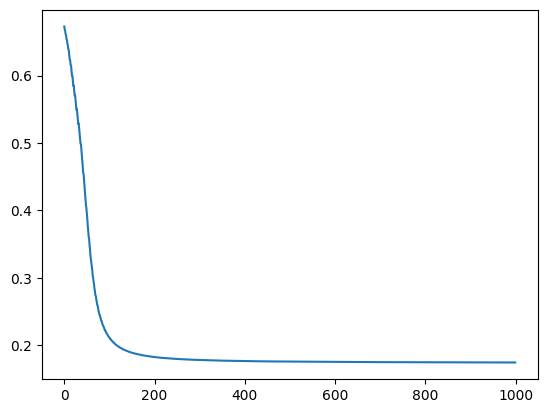

In [24]:
# 设置随机种子，训练轮数与训练集大小
np.random.seed(1007)
EPOCH = 1000
N = X.shape[0]

# 创建一个层大小为[2, 4, 2]的多层感知机，并将学习率设置为0.1
mlp = MLP([2, 4, 2], learning_rate=0.1, activation="relu")

loss = np.zeros(EPOCH)
for epoch in range(EPOCH):
    for i in range(N):
        mlp.train(X[i], Y[i])
        
    # 计算损失
    for i in range(N):
        loss[epoch] += mlp.loss(X[i], Y[i])
        
    loss[epoch] /= N
    
# 将损失变化进行可视化
plt.figure()
ix = np.arange(EPOCH)
plt.plot(ix, loss)
plt.show()

**Extra：用Pytorch库实现相似的效果**

在Pytorch库中已经封装好了以上我们实现的功能，例如线性层和激活函数等，我们将使用这些功能实现相似的效果，你也可以试着改变多层感知机的结构进行学习。

**Extra部分均不计入小作业评分。**

In [34]:
import torch # PyTorch库
import torch.nn as nn # PyTorch中与神经网络相关的工具
from torch.nn.init import normal_ # 正态分布初始化

torch_activation_dict = {
    'identity': lambda x: x,
    'softmax': nn.Softmax(dim=1),
    'tanh': torch.tanh,
    'relu': torch.relu
}

# 定义MLP类，基于PyTorch的自定义模块通常都继承nn.Module
# 继承后，只需要实现forward函数，进行前向传播
# 反向传播与梯度计算均由PyTorch自动完成
class MLP_torch(nn.Module):

    def __init__(
        self, 
        layer_sizes, # 包含每层大小的list
        use_bias=True, 
        activation='relu',
        out_activation='identity'
    ):
        super().__init__() # 初始化父类
        self.activation = torch_activation_dict[activation]
        self.out_activation = torch_activation_dict[out_activation]
        self.layers = nn.ModuleList() # ModuleList以列表方式存储PyTorch模块
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1:]:
            #############################################################################
            # TODO: 为layers添加线性层，不要忘记初始化参数
            #############################################################################
            self.layers.append(nn.Linear(num_in, num_out, bias=use_bias))
          #  normal_(self.layers[-1].weight, 0, 0.1)
            num_in = num_out
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

    def forward(self, x):
        # 前向传播
        # PyTorch可以自行处理batch_size等维度问题
        # 我们只需要让输入依次通过每一层即可
        #############################################################################
        # TODO: 实现前向传播
        #############################################################################
        for layer in self.layers:
            x = self.activation(layer(x))
        x=self.out_activation(x)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        return x

预测精度： 1.0


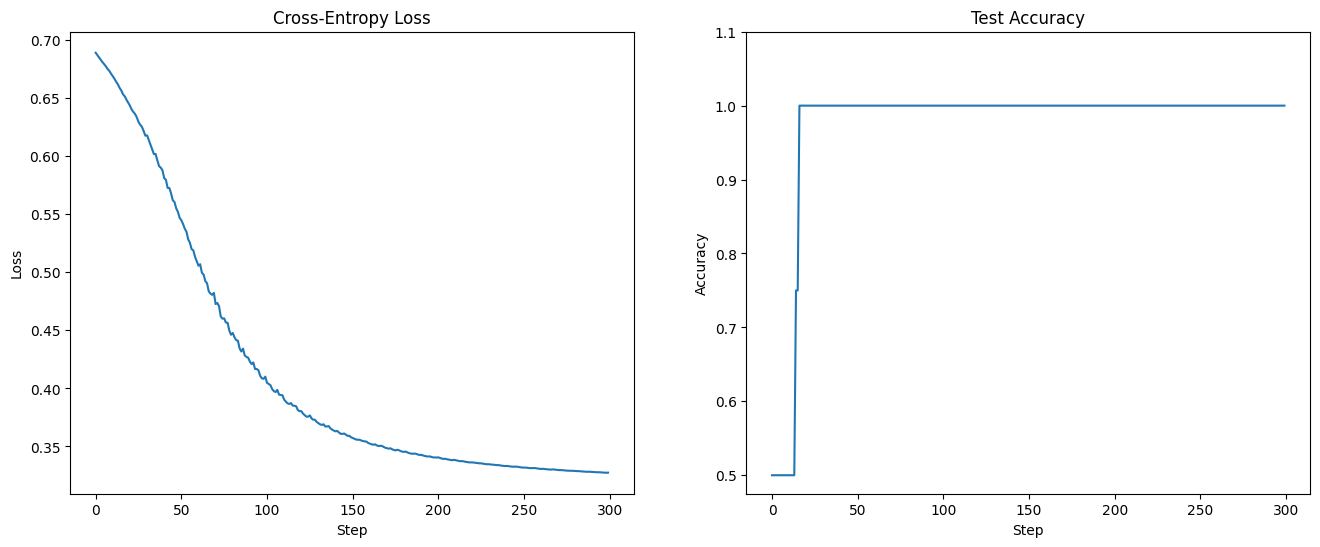

In [35]:
# 设置超参数
num_epochs = 300
learning_rate = 0.5
crt = nn.CrossEntropyLoss()
torch.manual_seed(0)

# 初始化MLP模型
mlp = MLP_torch(layer_sizes=[2, 4, 2], use_bias=True, 
    out_activation='softmax')

# 定义SGD优化器
opt = torch.optim.SGD(mlp.parameters(), lr=learning_rate)

# 训练过程
losses = []
accs = []
x_train = torch.from_numpy(X).to(dtype=torch.float32)
y_train = torch.from_numpy(Y).to(dtype=torch.float32)
for epoch in range(num_epochs):
    # 计算MLP的预测
    # 调用模型时，PyTorch会自动调用模型的forward方法
    y_pred = mlp(x_train)
    # 计算交叉熵损失
    train_loss = crt(y_pred, y_train)
    # 清空梯度
    opt.zero_grad()
    # 反向传播
    train_loss.backward()
    # 更新参数
    opt.step()
    # 记录累加损失，需要先将损失从张量转为numpy格式
    losses.append(train_loss.detach().numpy())
    # 计算训练集上的精度
    # 在不需要梯度的部分，可以用torch.inference_mode()加速计算
    with torch.inference_mode():
        acc = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y_train, dim=1)) / len(x_train)
        accs.append(acc.detach().numpy())

print('预测精度：', accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, label='train loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')

plt.subplot(122)
plt.plot(accs)
plt.ylim(top=1.1)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

**Extra：训练（更多的）非线性可分数据** 

下面是在之后的SVM作业中会出现的非线性可分数据，你可以通过自定义多层感知机的网络结构学习。
（可以用自己之前实现的多层感知机也可以直接调库）

**Extra部分均不计入小作业评分。**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1024)

def data_visualization(x, y, pdim=2):
    category = {'+1': [], '-1': []}
    for point, label in zip(x, y):
        if label == 1.0: category['+1'].append(point)
        else: category['-1'].append(point)
    fig = plt.figure()
    if pdim == 2 or pdim == 1:
        ax = fig.add_subplot(111)
    elif pdim == 3:
        ax = fig.add_subplot(111, projection='3d')

    for label, pts in category.items():
        pts = np.array(pts)
        if pdim == 1:
            ax.scatter(pts[:, 0], label=label)
        elif pdim == 2:
            ax.scatter(pts[:, 0], pts[:, 1], label=label)
        elif pdim == 3:
            if label == '+1':
                c = 'blue'
                m = 'o'
            else:
                c = 'black'
                m = 'x'
            ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c=c, marker=m)
    plt.show() 

data = np.loadtxt('./dataset/Assignment2/data.txt')
x_sp = data[:,:2]
y_sp_tmp = data[:,2]
y_sp = np.zeros((len(x_sp), 2))
y_sp[y_sp_tmp == 1, 1] = 1
y_sp[y_sp_tmp == -1, 0] = 1
data_visualization(x_sp, y_sp_tmp)
print("Shape of y is {}".format(y_sp.shape))
print("Shape of x is {}".format(x_sp.shape))

In [ ]:
#############################################################################
# Extra: 通过自定义网络结构学习上面的样例 
#############################################################################


#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################